In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [211]:
airdata = pd.DataFrame()
airdata.index = pd.to_datetime(airdata.index)
for i in range(1,16): 
    result = pd.read_csv('madrid_20{0}{1}.csv'.format(int(i/10),i%10),index_col='date')
    result.index = pd.to_datetime(result.index)
    airdata = pd.concat([airdata,result])
airdata.info()

/home/jordi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3319512 entries, 2001-08-01 01:00:00 to 2015-08-01 00:00:00
Data columns (total 17 columns):
BEN        float64
CO         float64
EBE        float64
MXY        float64
NMHC       float64
NO         float64
NO_2       float64
NOx        float64
OXY        float64
O_3        float64
PM10       float64
PM25       float64
PXY        float64
SO_2       float64
TCH        float64
TOL        float64
station    int64
dtypes: float64(16), int64(1)
memory usage: 455.9 MB


In [212]:
airdata.describe()

,BEN,CO,EBE,MXY,NMHC,NO,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
count,923778.000000,2.449414e+06,884467.000000,315415.000000,1.025430e+06,1.045892e+06,3.300545e+06,2.254631e+06,315695.000000,2.709088e+06,2.617311e+06,693324.000000,315584.000000,2.574548e+06,1.026559e+06,921200.000000,3.319512e+06
mean,1.340611,5.662748e-01,1.545206,4.650394,1.914670e-01,2.395349e+01,5.203448e+01,1.101715e+02,2.280912,3.895714e+01,2.989640e+01,14.439076,2.056178,1.094115e+01,1.439204e+00,6.315227,2.807903e+07
std,1.994826,5.496479e-01,2.236028,5.599223,1.554719e-01,5.143612e+01,3.484505e+01,1.096200e+02,2.639609,2.991074e+01,2.638668e+01,11.591802,2.395130,9.291107e+00,2.313412e-01,8.865154,2.035405e+01
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-31.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.807900e+07
25%,0.240000,2.700000e-01,0.480000,1.200000,1.000000e-01,2.000000e+00,2.528000e+01,4.102000e+01,0.960000,1.234000e+01,1.200000e+01,7.000000,0.800000,6.000000e+00,1.310000e+00,1.300000,2.807901e+07
50%,0.680000,4.000000e-01,1.000000,2.800000,1.600000e-01,6.000000e+00,4.600000e+01,7.740000e+01,1.320000,3.366000e+01,2.230000e+01,11.560000,1.280000,8.340000e+00,1.390000e+00,3.520000,2.807902e+07
75%,1.610000,6.700000e-01,1.750000,5.890000,2.400000e-01,2.100000e+01,7.127000e+01,1.409000e+02,2.740000,5.838000e+01,3.900000e+01,18.440001,2.510000,1.256000e+01,1.510000e+00,7.580000,2.807904e+07
max,66.389999,1.804000e+01,162.199997,177.600006,6.860000e+00,1.146000e+03,6.286000e+02,2.537000e+03,103.000000,2.360000e+02,6.950000e+02,506.899994,106.000000,1.991000e+02,8.560000e+00,242.899994,2.807910e+07


In [213]:
airdata = airdata.drop('BEN',1)
airdata = airdata.drop('EBE',1)
airdata = airdata.drop('MXY',1)
airdata = airdata.drop('NMHC',1)
airdata = airdata.drop('NO',1)
airdata = airdata.drop('NOx',1)
airdata = airdata.drop('OXY',1)
airdata = airdata.drop('PXY',1)
airdata = airdata.drop('TCH',1)
airdata = airdata.drop('TOL',1)
airdata = airdata.drop('PM25',1)
airdata = airdata.drop('station',1)
airdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3319512 entries, 2001-08-01 01:00:00 to 2015-08-01 00:00:00
Data columns (total 5 columns):
CO      float64
NO_2    float64
O_3     float64
PM10    float64
SO_2    float64
dtypes: float64(5)
memory usage: 152.0 MB


In [214]:
airdata = airdata.resample('D',how='mean')
airdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 5 columns):
CO      5479 non-null float64
NO_2    5479 non-null float64
O_3     5479 non-null float64
PM10    5479 non-null float64
SO_2    5479 non-null float64
dtypes: float64(5)
memory usage: 256.8 KB


/home/jordi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [215]:
airdata.head()

,CO,NO_2,O_3,PM10,SO_2
date,,,,,
2001-01-01,0.998400,47.760278,22.275357,19.367887,18.896400
2001-01-02,0.713709,45.141650,36.652239,17.426450,16.859624
2001-01-03,0.871186,53.401426,23.558798,24.811873,18.297260
2001-01-04,0.848846,50.055048,25.265474,25.086376,17.920690
2001-01-05,1.197067,51.629295,11.781987,26.796617,18.446490


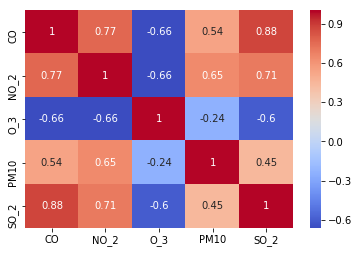

In [216]:
sns.heatmap(airdata.corr(),cmap='coolwarm',annot=True)

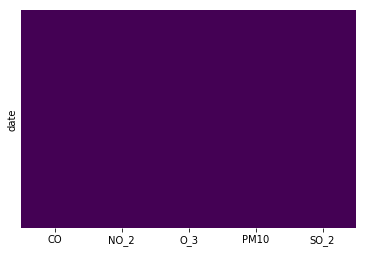

In [217]:
sns.heatmap(airdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [218]:
airdatam = [pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame]

In [219]:
airdatam[0] = airdata.drop(['NO_2','O_3','PM10','SO_2'], axis = 1)
airdatam[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
CO    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


In [220]:
airdatam[1] = airdata.drop(['CO','O_3','PM10','SO_2'], axis = 1)
airdatam[1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
NO_2    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


In [221]:
airdatam[2] = airdata.drop(['NO_2','CO','PM10','SO_2'], axis = 1)
airdatam[2].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
O_3    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


In [222]:
airdatam[3] = airdata.drop(['NO_2','O_3','CO','SO_2'], axis = 1)
airdatam[3].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
PM10    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


In [223]:
airdatam[4] = airdata.drop(['NO_2','O_3','PM10','CO'], axis = 1)
airdatam[4].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2001-01-01 to 2016-01-01
Freq: D
Data columns (total 1 columns):
SO_2    5479 non-null float64
dtypes: float64(1)
memory usage: 85.6 KB


In [224]:
weather = pd.read_csv('weather_modificat.csv',index_col= 'date')

In [225]:
weather.index = pd.to_datetime(weather.index)

In [226]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5448 entries, 2001-01-01 to 2015-12-31
Data columns (total 14 columns):
Max TemperatureC              5448 non-null float64
Mean TemperatureC             5448 non-null float64
Min TemperatureC              5448 non-null float64
Dew PointC                    5448 non-null float64
MeanDew PointC                5448 non-null float64
Min DewpointC                 5448 non-null float64
Max Humidity                  5448 non-null float64
Mean Humidity                 5448 non-null float64
Min Humidity                  5448 non-null float64
Max Sea Level PressurehPa     5448 non-null int64
Mean Sea Level PressurehPa    5448 non-null int64
Min Sea Level PressurehPa     5448 non-null int64
Max Wind SpeedKm/h            5448 non-null int64
Mean Wind SpeedKm/h           5448 non-null int64
dtypes: float64(9), int64(5)
memory usage: 638.4 KB


In [227]:
for i in range(5):
    airdatam[i] = airdatam[i].join(weather)
    airdatam[i].dropna(inplace = True)

In [228]:
airdatam[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5448 entries, 2001-01-01 to 2015-12-31
Data columns (total 15 columns):
CO                            5448 non-null float64
Max TemperatureC              5448 non-null float64
Mean TemperatureC             5448 non-null float64
Min TemperatureC              5448 non-null float64
Dew PointC                    5448 non-null float64
MeanDew PointC                5448 non-null float64
Min DewpointC                 5448 non-null float64
Max Humidity                  5448 non-null float64
Mean Humidity                 5448 non-null float64
Min Humidity                  5448 non-null float64
Max Sea Level PressurehPa     5448 non-null float64
Mean Sea Level PressurehPa    5448 non-null float64
Min Sea Level PressurehPa     5448 non-null float64
Max Wind SpeedKm/h            5448 non-null float64
Mean Wind SpeedKm/h           5448 non-null float64
dtypes: float64(15)
memory usage: 681.0 KB


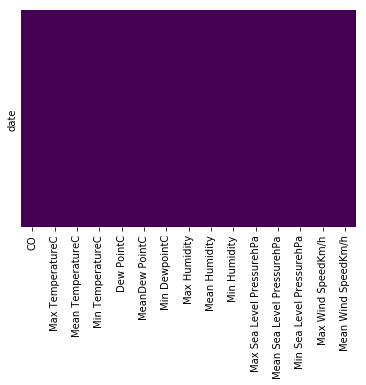

In [229]:
sns.heatmap(airdatam[0].isnull(),yticklabels=False,cbar=False,cmap='viridis')

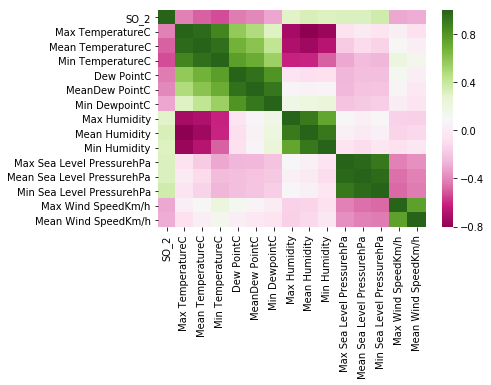

In [242]:
sns.heatmap(airdatam[4].corr(), cmap="PiYG")

In [231]:
gas = ['CO','NO_2','O_3','PM10','SO_2']

In [98]:
###################################################################################

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
data = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(airdatam[i].drop( gas[i] ,axis=1), airdatam[i], test_size=0.3, random_state=101)
    data.append([X_train,X_test,y_train,y_test])

In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
linearmodel = []
prediction = []
for i in range(5):
    linearmodel.append(LinearRegression())
    linearmodel[i].fit(data[i][0],data[i][2])
    prediction.append(linearmodel[i].predict(data[i][1]))

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

In [236]:
for i in range(5):
    print('Coefficients: \n', linearmodel[i].coef_)

Coefficients: 
 [[ 3.20904869e-02 -7.72761247e-03 -9.64864439e-03  8.83631641e-03
  -3.66859956e-02 -2.89320381e-03 -2.24330013e-03  1.09487347e-02
   4.59065941e-03 -5.44513182e-03 -9.86870756e-04  1.29132278e-02
  -1.24343814e-03 -6.11847027e-03]
 [ 1.00000000e+00 -6.67162631e-16  5.93814828e-17 -5.62576693e-17
   2.24420841e-16  8.04244639e-17  1.81107828e-16 -5.72802408e-17
   2.55749144e-16 -5.72823506e-17 -1.44860510e-16 -5.87578373e-17
  -2.09802286e-16  3.15125082e-16]
 [ 1.60280614e-15  1.00000000e+00 -5.50050367e-16  2.01955866e-16
  -1.54373139e-16  5.15354324e-16  1.77188757e-16  5.83177992e-16
   2.85415523e-16  5.02170390e-17 -1.71182085e-16  1.12597070e-16
  -1.95589358e-16  1.60520468e-16]
 [ 7.56133533e-16 -1.73336405e-15  1.00000000e+00 -1.42385825e-16
   1.39053890e-15 -5.81693698e-16  4.45914346e-16  5.69716410e-16
   4.74295913e-16 -4.51203344e-16  5.73864928e-17 -6.29808447e-18
   3.40417786e-18  2.64835237e-16]
 [ 2.50137114e-16 -1.59766091e-16 -9.47866905e-17  1

In [237]:
for i in range(5):
    print("Mean squared error: %.2f"
      % mean_squared_error(data[i][3], prediction[i]))

Mean squared error: 0.00
Mean squared error: 13.66
Mean squared error: 10.37
Mean squared error: 12.68
Mean squared error: 1.21


In [238]:
for i in range(5):
    print('Variance score: %.2f' % r2_score(data[i][3], prediction[i]))

Variance score: 0.96
Variance score: 0.97
Variance score: 0.98
Variance score: 0.95
Variance score: 0.96
